In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

titanic_data = pd.read_csv('titanic_train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)

In [26]:
#Fare는 survived와 관련이 많은 항목이지만 Pclass와 상관성이 높아서 삭제하는게 좋을거 같다.
print(titanic_data.corr())

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


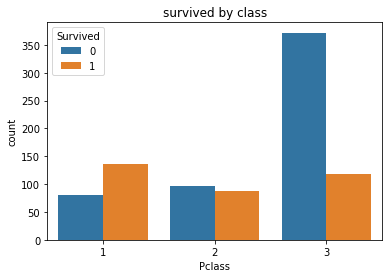

In [27]:
#class는 중요한 요소
sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic_data)
plt.legend(title="Survived")
plt.title('survived by class')
plt.show()

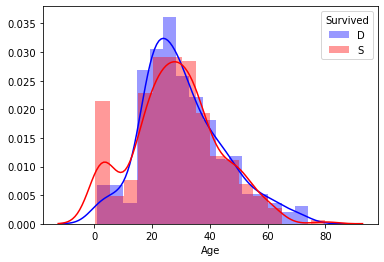

In [28]:
#Age에 따라 생존률이 다르다. 중유한 요소
sns.distplot(titanic_data[titanic_data.Survived == 0]["Age"], color="blue", label="D")
sns.distplot(titanic_data[titanic_data.Survived == 1]["Age"], color="red", label="S")
plt.legend(title="Survived")
plt.show()

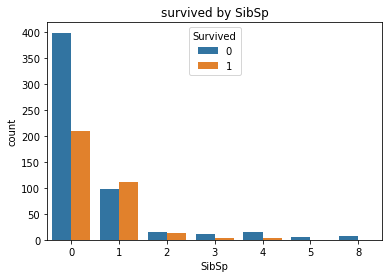

In [29]:
#SibSp는 중요한 요소
sns.countplot(x = 'SibSp', hue = 'Survived', data = titanic_data)
plt.legend(title="Survived")
plt.title('survived by SibSp')
plt.show()

In [30]:
# 중요한 요소이긴 하지만 2이상은 데이터가 적어서, 있는지 없는지 정도로 하는게 좋을듯
titanic_data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

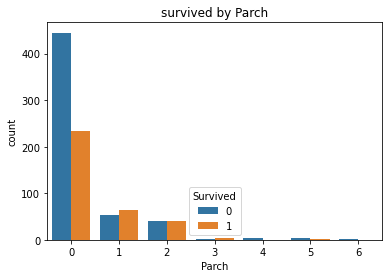

In [31]:
#Parch는 중요한 요소
sns.countplot(x = 'Parch', hue = 'Survived', data = titanic_data)
plt.legend(title="Survived")
plt.title('survived by Parch')
plt.show()

In [32]:
# 중요한 요소이긴 하지만 2이상은 데이터가 적어서, 있는지 없는지 정도로 하는게 좋을듯
titanic_data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [33]:
# cabin은 nan값이 많아서 삭제를 하는게 좋을지 모르겠는다. 그런데 이게 선실의 위치인거 같고 이거에 따라 생존률이 달라서 고민
# 어쩌면 이게 또 Pclass와 중복된 정보일수도 있다.
titanic_data.Cabin.fillna('N', inplace = True)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,N,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,N,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,N,S


In [34]:
titanic_data['H_Cabin'] = titanic_data['Cabin'].apply(lambda x : x[0])
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,H_Cabin
0,0,3,male,22.0,1,0,7.2500,N,S,N
1,1,1,female,38.0,1,0,71.2833,C85,C,C
2,1,3,female,26.0,0,0,7.9250,N,S,N
3,1,1,female,35.0,1,0,53.1000,C123,S,C
4,0,3,male,35.0,0,0,8.0500,N,S,N


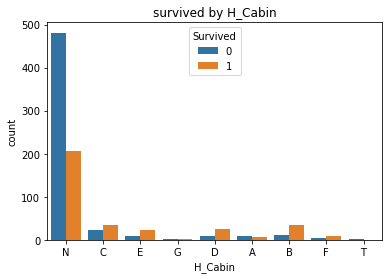

In [35]:
sns.countplot(x = 'H_Cabin', hue = 'Survived', data = titanic_data)
plt.legend(title="Survived")
plt.title('survived by H_Cabin')
plt.show()

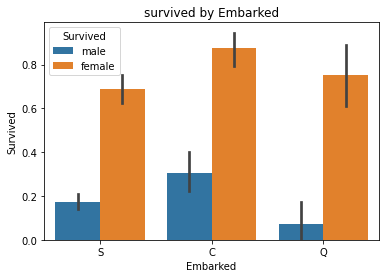

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
# 값에 따라서 생존률이 다른 중요한 변수임을 알 수 있다.
sns.barplot(x = 'Embarked', y = 'Survived', hue = 'Sex', data = titanic_data)
plt.legend(title="Survived")
plt.title('survived by Embarked')
plt.show()

titanic_data.Embarked.value_counts()

In [37]:
#missing value 처리
#Age는 평균값으로 처리
titanic_data.Age.fillna(titanic_data.Age.mean(), inplace = True)
#Cabin은 삭제하고 H_cabin사용
titanic_data = titanic_data.drop(['Cabin'], axis = 1)
#Embarked는 가장 많은  S로
titanic_data.Embarked.fillna('S', inplace = True)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   H_Cabin   891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [38]:
#분류 값들을 수치값으로 변경
titanic_data.Sex.replace({'male': 0.0, 'female': 1.0}, inplace= True)

#Dependents 값을 get_dummies 함수를 이용해서 수치로 변경 OneHotEncode를 사용해도 된다.
#drop first를 True로 해서 dummy trap을 피한다.
dummies = pd.get_dummies(titanic_data['Embarked'], prefix='Embarked', drop_first=True)
titanic_data = pd.concat([titanic_data, dummies], axis=1)
titanic_data = titanic_data.drop(['Embarked'],  axis=1)

dummies = pd.get_dummies(titanic_data['H_Cabin'], prefix='Cabin', drop_first=True)
titanic_data = pd.concat([titanic_data, dummies], axis=1)
titanic_data = titanic_data.drop(['H_Cabin'],  axis=1)

titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T
0,0,3,0.0,22.0,1,0,7.2500,0,1,0,0,0,0,0,0,1,0
1,1,1,1.0,38.0,1,0,71.2833,0,0,0,1,0,0,0,0,0,0
2,1,3,1.0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0
3,1,1,1.0,35.0,1,0,53.1000,0,1,0,1,0,0,0,0,0,0
4,0,3,0.0,35.0,0,0,8.0500,0,1,0,0,0,0,0,0,1,0


In [39]:
from sklearn.model_selection import train_test_split
#Test를 위한 데이터 생성
y_data = titanic_data.Survived
x_data = titanic_data.drop('Survived', axis = 1)
#test 와 train set 만들기
X_train, X_test, y_train, y_test= train_test_split(x_data, y_data, test_size=0.2, random_state=123)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

dt_clf = DecisionTreeClassifier(random_state=1)
rf_clf = RandomForestClassifier(random_state=1)
lr_clf = LogisticRegression()

dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print("DecisionTree :{0:.4f}".format(accuracy_score(y_test,dt_pred)))

rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print("Random Forest Tree :{0:.4f}".format(accuracy_score(y_test,rf_pred)))

lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print("LogisticRegression :{0:.4f}".format(accuracy_score(y_test,lr_pred)))

DecisionTree :0.8156
Random Forest Tree :0.8380
LogisticRegression :0.8212


C:\Users\Professor Lee\anaconda3\envs\tf2\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [53]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(y_test , w_preds, w_pred_proba)

오차 행렬
[[102  12]
 [ 10  55]]
정확도: 0.8771, 정밀도: 0.8209, 재현율: 0.8462,    F1: 0.8333, AUC:0.9094


In [44]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2, 5,10,15], 'learning_rate':[0.05,0.1, 0.15], 'n_estimators':[10,25,50,100,500]}

grid_xgb = GridSearchCV(xgb_wrapper, param_grid=parameters, scoring = 'accuracy', cv=5)
grid_xgb.fit(X_train,y_train)

print("최적화 파라미터 :", grid_xgb.best_params_)
print("GridSearch_CV 최고정확도: {0:.4f}".format(grid_xgb.best_score_))
best_xgb = grid_xgb.best_estimator_

#grid로 찾은 최적화 파라미터로 예측
xgb_pred = best_xgb.predict(X_test)
print("Best Grid RF:{0:.4f}".format(accuracy_score(y_test,xgb_pred)))
print(classification_report(y_test, xgb_pred))

최적화 파라미터 : {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}
GridSearch_CV 최고정확도: 0.8286
Best Grid RF:0.8659
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       114
           1       0.82      0.82      0.82        65

    accuracy                           0.87       179
   macro avg       0.86      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179



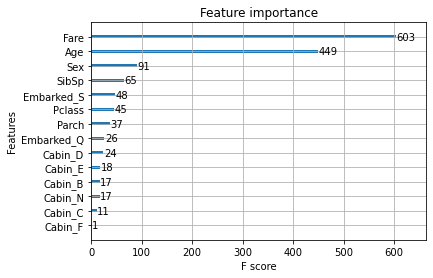

In [58]:
import xgboost as xgb
xgb.plot_importance(best_xgb)

In [47]:
#xgb model에 Bayesian Optimization를 적용해서 hyper parameter를 최적화한다.
# 주의할점 : 기본적으로 float값을 parameter로 가정하므로 반드시 정수값을 넣어야 하는 경우는 int(rount())를 사용해서 정수로 변환이 필요.
# 그런데 이 경우 loop에 빠질수가 있으므로 다른 방법도 같이 고려하는게 좋을 수도 있다.
from bayes_opt import BayesianOptimization

def xgbscore_function(n_e, l_r, m_d) :
    xgb_wrapper = XGBClassifier(n_estimators=int(round(n_e)), learning_rate=l_r, max_depth=int(round(m_d)), early_stopping_rounds=50)
    xgb_wrapper.fit(X_train, y_train)
    w_preds = xgb_wrapper.predict(X_test)
    score = accuracy_score(y_test, w_preds)
    return score

# Bounded region of parameter space
pbounds = {'n_e': (50, 1000), 'l_r': (0.01, 0.2), 'm_d':(1, 10)}

optimizer1 = BayesianOptimization(
    f=xgbscore_function,
    pbounds=pbounds,
    verbose=2, # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    random_state=1,
)

optimizer1.maximize(
    init_points=3,
    n_iter=20,
)

print(optimizer1.max)

|   iter    |  target   |    l_r    |    m_d    |    n_e    |
-------------------------------------------------------------
|  1        |  0.8771   |  0.08923  |  7.483    |  50.11    |
|  2        |  0.8324   |  0.06744  |  2.321    |  137.7    |
|  3        |  0.8659   |  0.04539  |  4.11     |  426.9    |
|  4        |  0.8324   |  0.2      |  1.0      |  1e+03    |
|  5        |  0.8492   |  0.1865   |  4.985    |  52.62    |
|  6        |  0.8603   |  0.01     |  10.0     |  715.5    |
|  7        |  0.8659   |  0.01     |  10.0     |  289.0    |
|  8        |  0.8436   |  0.1176   |  9.499    |  859.7    |
|  9        |  0.8603   |  0.01     |  10.0     |  569.1    |
|  10       |  0.8268   |  0.2      |  10.0     |  207.3    |
|  11       |  0.838    |  0.1014   |  1.0      |  643.2    |
|  12       |  0.7989   |  0.01     |  1.0      |  786.3    |
|  13       |  0.8492   |  0.08389  |  9.973    |  364.4    |
|  14       |  0.8436   |  0.06215  |  9.981    |  939.9    |
|  15   

In [26]:
# 나이를 분류값으로 변경
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_data['Age_cat'] = titanic_data['Age'].apply(lambda x : get_category(x))
titanic_data.drop('Age', axis=1, inplace=True)

#분류된 나이를 one_hot으로
dummies = pd.get_dummies(titanic_data['Age_cat'], prefix='A', drop_first=True)
titanic_data = pd.concat([titanic_data, dummies], axis=1)
titanic_data = titanic_data.drop(['Age_cat'],  axis=1)

titanic_data.head()

KeyError: 'Age'

In [27]:
from sklearn.model_selection import train_test_split
#Test를 위한 데이터 생성
y_data = titanic_data.Survived
x_data = titanic_data.drop('Survived', axis = 1)
#test 와 train set 만들기
X_train, X_test, y_train, y_test= train_test_split(x_data, y_data, test_size=0.2, random_state=123)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_clf = DecisionTreeClassifier(random_state=1)
rf_clf = RandomForestClassifier(random_state=1)

dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print("DecisionTree :{0:.4f}".format(accuracy_score(y_test,dt_pred)))

rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print("Random Forest Tree :{0:.4f}".format(accuracy_score(y_test,rf_pred)))

DecisionTree :0.8212
Random Forest Tree :0.8380


In [29]:
#나이를 분류로 한경우 결과가 더 나빴다.
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2, 5,10,15], 'min_samples_leaf':[1,3,5,8], 'n_estimators':[10,25,50]}

grid_rclf = GridSearchCV(rf_clf, param_grid=parameters, scoring = 'accuracy', cv=5)
grid_rclf.fit(X_train,y_train)

print("최적화 파라미터 :", grid_rclf.best_params_)
print("GridSearch_CV 최고정확도: {0:.4f}".format(grid_rclf.best_score_))
best_rclf = grid_rclf.best_estimator_

#grid로 찾은 최적화 파라미터로 예측
grid_r_pred = best_rclf.predict(X_test)
print("Best Grid RF:{0:.4f}".format(accuracy_score(y_test,grid_r_pred)))
print(classification_report(y_test, grid_r_pred))

최적화 파라미터 : {'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 50}
GridSearch_CV 최고정확도: 0.8188
Best Grid RF:0.8492
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       114
           1       0.83      0.74      0.78        65

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.85      0.85      0.85       179

